In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

In [3]:
sc = SparkContext()

In [4]:
spark = SparkSession(sc)

In [5]:
#1. Read data => data
# file from hdfs
# file_name = 'hdfs://...complaints.csv'
file_name = 'Cung cap du lieu buoi 4/complaints.csv'
data = spark.read.csv(file_name, header = True, inferSchema = True)

In [6]:
#2. Display the number of rows data, print schema
# Display first 3 rows
data.count()

2083368

In [7]:
data.printSchema()

root
 |-- Date received: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sub-product: string (nullable = true)
 |-- Issue: string (nullable = true)
 |-- Sub-issue: string (nullable = true)
 |-- Consumer complaint narrative: string (nullable = true)
 |-- Company public response: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZIP code: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Consumer consent provided?: string (nullable = true)
 |-- Submitted via: string (nullable = true)
 |-- Date sent to company: string (nullable = true)
 |-- Company response to consumer: string (nullable = true)
 |-- Timely response?: string (nullable = true)
 |-- Consumer disputed?: string (nullable = true)
 |-- Complaint ID: string (nullable = true)



In [8]:
for row in data.head(3):
    print(row)
    print('\n')

Row(Date received='2019-09-24', Product='Debt collection', Sub-product='I do not know', Issue='Attempts to collect debt not owed', Sub-issue='Debt is not yours', Consumer complaint narrative='transworld systems inc. ', Company public response=None, Company=None, State=None, ZIP code=None, Tags=None, Consumer consent provided?=None, Submitted via=None, Date sent to company=None, Company response to consumer=None, Timely response?=None, Consumer disputed?=None, Complaint ID=None)


Row(Date received='is trying to collect a debt that is not mine', Product=' not owed and is inaccurate."', Sub-product=None, Issue='TRANSWORLD SYSTEMS INC', Sub-issue='FL', Consumer complaint narrative='335XX', Company public response=None, Company='Consent provided', State='Web', ZIP code='2019-09-24', Tags='Closed with explanation', Consumer consent provided?='Yes', Submitted via='N/A', Date sent to company='3384392', Company response to consumer=None, Timely response?=None, Consumer disputed?=None, Complain

In [9]:
from pyspark.sql.functions import col, udf

In [10]:
from pyspark.sql.functions import isnan, when, count, col

In [11]:
#3. Check for NaN, Null values
data.select([count(when(isnan(c), c)).alias(c) for c in data.columns]).toPandas().T

,0
Date received,0
Product,0
Sub-product,0
Issue,0
Sub-issue,0
Consumer complaint narrative,0
Company public response,0
Company,0
State,0
ZIP code,0


In [12]:
# => No NaN values

In [13]:
data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).toPandas().T

,0
Date received,40
Product,209258
Sub-product,511176
Issue,325183
Sub-issue,931248
Consumer complaint narrative,1454171
Company public response,1412034
Company,573431
State,597994
ZIP code,673059


In [14]:
# There are many Null values in columns

In [15]:
#4. Check duplicated values and remove

In [16]:
num_rows = data.count()

In [17]:
num_dist_rows = data.distinct().count()

In [18]:
num_dist_rows

2020609

In [19]:
# There are many duplicated values in data
dup_rows = num_rows - num_dist_rows

In [20]:
dup_rows

62759

In [21]:
# Remove duplicated values
data = data.drop_duplicates()

In [22]:
data.distinct().count()

2020609

In [23]:
# No duplicated values left

In [24]:
#5. Check again Null values. Calculate the % ratio. Consider ways of handling Null values.
null_data = data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).toPandas().T

In [25]:
type(null_data)

pandas.core.frame.DataFrame

In [26]:
null_data

,0
Date received,39
Product,178373
Sub-product,472168
Issue,281416
Sub-issue,884470
Consumer complaint narrative,1405173
Company public response,1353196
Company,513337
State,537111
ZIP code,611785


In [27]:
null_data['percentage'] = (null_data[0]/num_dist_rows)*100

In [28]:
null_data

,0,percentage
Date received,39,0.001930
Product,178373,8.827685
Sub-product,472168,23.367608
Issue,281416,13.927286
Sub-issue,884470,43.772447
Consumer complaint narrative,1405173,69.542054
Company public response,1353196,66.969711
Company,513337,25.405064
State,537111,26.581639
ZIP code,611785,30.277258


In [29]:
#6. Create new dataset, in which removing the colunmns contain Null values over 30%
data_sub = data.select(['Date received', 'Product',
                        'Sub-product', 'Issue',
                        'Company', 'State', 
                        'Consumer consent provided?',
                        'Submitted via'])

In [30]:
data_sub.show(2)

+--------------------+--------------------+-----------+-----+-------+-----+--------------------------+-------------+
|       Date received|             Product|Sub-product|Issue|Company|State|Consumer consent provided?|Submitted via|
+--------------------+--------------------+-----------+-----+-------+-----+--------------------------+-------------+
|****United XXXXXX...| 12 CFR 1024.17 (...|       null| null|   null| null|                      null|         null|
|**See attached 1s...|                null|       null| null|   null| null|                      null|         null|
+--------------------+--------------------+-----------+-----+-------+-----+--------------------------+-------------+
only showing top 2 rows



In [31]:
#7. Remove rows in which 'Date received' is Null and/or 'Product' is Null

In [32]:
data_sub = data_sub.dropna(how='any', 
                           subset=['Date received', 'Product'])

In [33]:
data_sub.select([count(when(col(c).isNull(), c)).alias(c) for c in data_sub.columns]).toPandas().T

,0
Date received,0
Product,0
Sub-product,332225
Issue,141159
Company,373348
State,397120
Consumer consent provided?,399331
Submitted via,381799


In [34]:
#8. Create column 'date_from_text' contains data yyyy-dd-mm based on 'Date received' for valid data, if not return ''.
# Filter data_sub with condition 'date_from_text' different from ''

In [35]:
from pyspark.sql import functions as F

In [36]:
data_sub = data_sub.withColumn('date_from_text',
                               F.regexp_extract(data_sub['Date received'],
                                               r"(\d{4}-\d{1,2}-\d{1,2})",0))

In [37]:
data_sub.select('date_from_text', 'Date received').head(5)

[Row(date_from_text='', Date received='****United XXXXXXXX XXXX and XXXX XXXX XXXX dba XXXX XXXX clearly violated Regulation X'),
 Row(date_from_text='', Date received='- was informed that the 2nd settlement agreement created on XX/XX/XXXX'),
 Row(date_from_text='', Date received='13. Finally'),
 Row(date_from_text='', Date received='4.Please send this information to my address listed above and accept this formal complaint asmy formal debt validation request'),
 Row(date_from_text='', Date received='Also')]

In [38]:
data_sub = data_sub.filter(data_sub['date_from_text']!='')

In [39]:
data_sub.select('date_from_text', 'Date received').head(10)

[Row(date_from_text='2019-02-28', Date received='2019-02-28'),
 Row(date_from_text='2019-06-07', Date received='2019-06-07'),
 Row(date_from_text='2019-05-20', Date received='2019-05-20'),
 Row(date_from_text='2019-02-15', Date received='2019-02-15'),
 Row(date_from_text='2019-08-03', Date received='2019-08-03'),
 Row(date_from_text='2019-04-05', Date received='2019-04-05'),
 Row(date_from_text='2019-05-04', Date received='2019-05-04'),
 Row(date_from_text='2019-06-06', Date received='2019-06-06'),
 Row(date_from_text='2019-03-18', Date received='2019-03-18'),
 Row(date_from_text='2019-01-15', Date received='2019-01-15')]

In [40]:
#9. Create new column 'CCP' data retrieved from column 'Consumer consent provided?'
# With column 'CCP' fill in 'Consent not provided' replace for Null values
data_sub.select(['Consumer consent provided?']).distinct().count()

12830

In [41]:
data_sub = data_sub.withColumn('CCP', data_sub['Consumer consent provided?'])

In [42]:
data_sub = data_sub.fillna('Consent not provided', subset='CCP')

In [43]:
#10. Create new column 'SV' data retrieved from column 'Submitted via'
# With column 'SV' fill in 'Other' replace for Null

In [44]:
data_sub = data_sub.withColumn('SV', data_sub['Submitted via'])

In [45]:
data_sub = data_sub.fillna('Other', subset='SV')

In [46]:
#11. Create new column 'Sub-pr' data retrieved from column 'Sub-product'
# With column 'Sub-pr' fill in 'I do not know' replace for Null

In [47]:
data_sub = data_sub.withColumn('Sub-pr', data_sub['Sub-product'])

In [48]:
data_sub = data_sub.fillna('I do now know', subset='Sub-pr')

In [49]:
data_sub.select([count(when(col(c).isNull(), c)).alias(c) for c in data_sub.columns]).toPandas().T

,0
Date received,0
Product,0
Sub-product,234541
Issue,0
Company,147497
State,173009
Consumer consent provided?,174052
Submitted via,156052
date_from_text,0
CCP,0


In [50]:
#12. Create column 'State_new' data retrieved from column 'State' by folling conditions:
# If there are valid information, take it
# If not, fill in 'unknown'

In [51]:
data_sub = data_sub.withColumn('State_new',
                               when(col('State').isNull(), 'unknown')
                              .otherwise(col('State')))

In [52]:
from pyspark.sql.functions import to_date, dayofweek, to_timestamp
from pyspark.sql import types
from pyspark.sql.functions import col, udf
from datetime import datetime
from pyspark.sql.types import DateType

In [53]:
#13. Create column 'Date_received' with data retrieved from 'date_from_text',
# Format time yyyy-mm-dd
func = udf (lambda x: datetime.strptime(x, '%Y-%m-%d'), DateType())
data_sub = data_sub.withColumn('Date_received', func(col('date_from_text')))

In [54]:
data_sub.printSchema()

root
 |-- Date received: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sub-product: string (nullable = true)
 |-- Issue: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Consumer consent provided?: string (nullable = true)
 |-- Submitted via: string (nullable = true)
 |-- date_from_text: string (nullable = true)
 |-- CCP: string (nullable = false)
 |-- SV: string (nullable = false)
 |-- Sub-pr: string (nullable = false)
 |-- State_new: string (nullable = true)
 |-- Date_received: date (nullable = true)



In [55]:
data_sub.select('Date_received').show(5)

+-------------+
|Date_received|
+-------------+
|   2019-02-28|
|   2019-06-07|
|   2019-05-20|
|   2019-02-15|
|   2019-08-03|
+-------------+
only showing top 5 rows



In [56]:
#14. Create new column contains day of week (1: Monday, 7: Sunday)
# with data retrieved from column 'Date_received'
data_sub = data_sub.withColumn('Day_of_week', dayofweek('Date_received'))

In [57]:
from pyspark.sql.functions import year, month

In [58]:
#15. Create column year, month contain year, month with data retrieved from column 'Date_received'
data_sub = data_sub.withColumn('year', year('Date_received'))\
                   .withColumn('month', month('Date_received'))

In [59]:
data_sub.select('Date_received', 'Day_of_Week', 'month', 'year').show(5)

+-------------+-----------+-----+----+
|Date_received|Day_of_Week|month|year|
+-------------+-----------+-----+----+
|   2019-02-28|          5|    2|2019|
|   2019-06-07|          6|    6|2019|
|   2019-05-20|          2|    5|2019|
|   2019-02-15|          6|    2|2019|
|   2019-08-03|          7|    8|2019|
+-------------+-----------+-----+----+
only showing top 5 rows



In [60]:
data_sub.select([count(when(col(c).isNull(), c)).alias(c) for c in data_sub.columns]).toPandas().T

,0
Date received,0
Product,0
Sub-product,234541
Issue,0
Company,147497
State,173009
Consumer consent provided?,174052
Submitted via,156052
date_from_text,0
CCP,0


In [61]:
#16. Plot a chart display the frequency of getting complaint by day of week
df = data_sub.select('Day_of_Week').toPandas()

array([[<AxesSubplot:title={'center':'Day_of_Week'}>]], dtype=object)

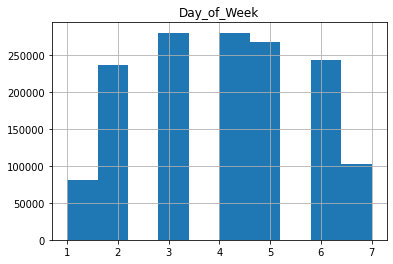

In [62]:
df.hist()

In [64]:
# Client complaint almost on Wednesday and Thursday
# Which one? Plot by chart?
df_products = data_sub.groupby('product').count().orderBy('count', 
                                                         ascending=False).toPandas()

In [65]:
df_products.head(20)

,product,count
0,"Credit reporting, credit repair services, or o...",331635
1,Mortgage,295097
2,Debt collection,278961
3,Credit reporting,139825
4,Credit card,89175
5,Bank account or service,86193
6,Credit card or prepaid card,67849
7,Checking or savings account,57461
8,Student loan,56365
9,Consumer Loan,31592


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

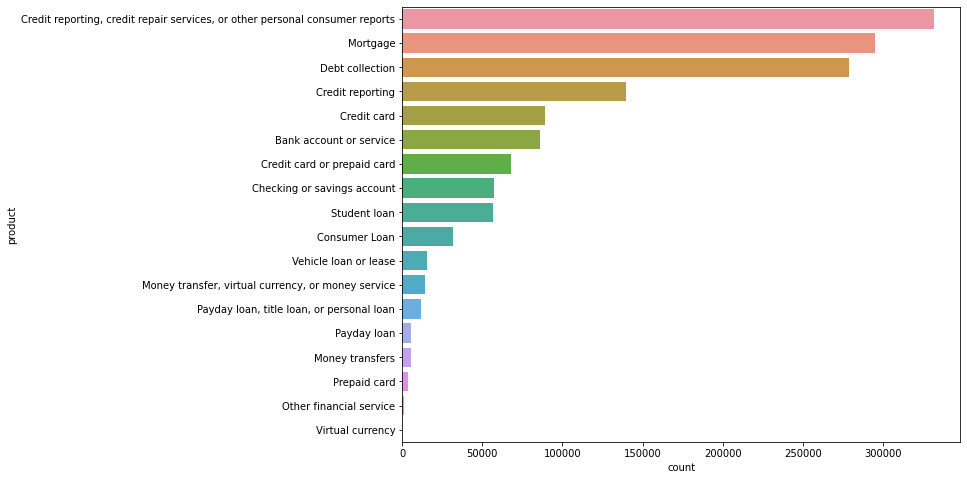

In [68]:
plt.figure(figsize=(10, 8))
sns.barplot(data = df_products, x='count', y='product',)
plt.show()